In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime, timedelta, date

In [2]:
main_df = pd.read_csv('../data/datatypes_cleaned.csv')
main_df.head()

/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_85412/4165977244.py:1: DtypeWarning: Columns (3,5,7,8,9,47) have mixed types. Specify dtype option on import or set low_memory=False.
  main_df = pd.read_csv('../data/datatypes_cleaned.csv')


,ZIP,Households (Count),White (Count),Black or African American (Count),American Indian and Alaska Native (Count),Asian (Count),Native Hawaiian and Other Pacific Islander (Count),Some other race (Count),Two or more races (Count),Hispanic or Latino origin (of any race) (Count),...,Latitude,Longitude,Mapped Location,Time to Resolve,Hours to Resolve,Days to Resolve,Neighborhood,Income Bracket,Minority Population %,Minority % Bracket
0,37013,35483.0,"16,986","14,101",90.0,"1,413",0.0,"1,235","1,658","3,971",...,36.080968,-86.602406,"(36.080968, -86.602406)",4 days 23:09:25,119.156944,4.964873,Antioch / Cane Ridge,$60K - $80K,58.6,40-60%
1,37013,35483.0,"16,986","14,101",90.0,"1,413",0.0,"1,235","1,658","3,971",...,36.072191,-86.664342,"(36.07219072, -86.66434192)",2 days 16:16:00,64.266667,2.677778,Antioch / Cane Ridge,$60K - $80K,58.6,40-60%
2,37013,35483.0,"16,986","14,101",90.0,"1,413",0.0,"1,235","1,658","3,971",...,36.050526,-86.606362,"(36.05052579, -86.60636223)",35 days 15:25:00,855.416667,35.642361,Antioch / Cane Ridge,$60K - $80K,58.6,40-60%
3,37013,35483.0,"16,986","14,101",90.0,"1,413",0.0,"1,235","1,658","3,971",...,36.073930,-86.609670,"(36.07393, -86.60967)",7 days 00:04:00,168.066667,7.002778,Antioch / Cane Ridge,$60K - $80K,58.6,40-60%
4,37013,35483.0,"16,986","14,101",90.0,"1,413",0.0,"1,235","1,658","3,971",...,36.044549,-86.612186,"(36.0445494, -86.6121858)",1 days 04:29:00,28.483333,1.186806,Antioch / Cane Ridge,$60K - $80K,58.6,40-60%


In [3]:
main_df['Income Bracket'].value_counts()

$60K - $80K        353014
$40K - $60K        238725
More Than $100K     72845
$80K - $100K        55741
Name: Income Bracket, dtype: int64

In [ ]:
main_df.info()

In [ ]:
print(main_df['Request Type'].value_counts().to_string())

In [ ]:
print(main_df['Subrequest Type'].value_counts().to_string())

In [ ]:
print(main_df['Additional Subrequest Type'].value_counts().to_string())

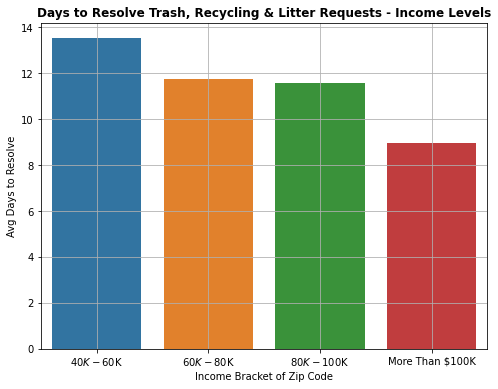

In [8]:
def trash_mean(main_df):
    return main_df['Days to Resolve'].mean()
request_trash = main_df.loc[(main_df['Request Type'] == 'Trash, Recycling & Litter')]
trash_groups = request_trash.groupby(['Income Bracket']).apply(trash_mean)
trash_groups = trash_groups.reset_index()
plt.figure(figsize = (8,6))
sns.barplot(x = 'Income Bracket', y = 0, data = trash_groups)
plt.ylabel('Avg Days to Resolve')
plt.xlabel('Income Bracket of Zip Code')
plt.title('Days to Resolve Trash, Recycling & Litter Requests - Income Levels', weight = 'bold', fontsize = 12)
plt.grid();

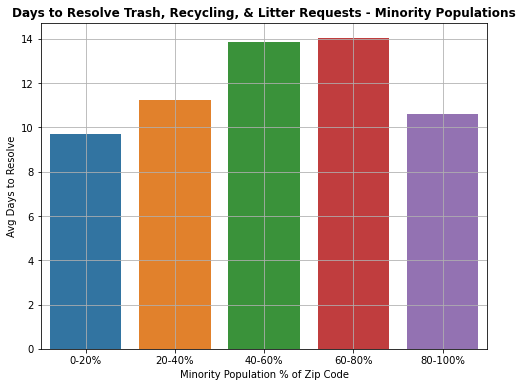

In [9]:
trash_groups_race = request_trash.groupby(['Minority % Bracket']).apply(trash_mean)
trash_groups_race = trash_groups_race.reset_index()
plt.figure(figsize = (8,6))
sns.barplot(x = 'Minority % Bracket', y = 0, data = trash_groups_race)
plt.ylabel('Avg Days to Resolve')
plt.xlabel('Minority Population % of Zip Code')
plt.title('Days to Resolve Trash, Recycling, & Litter Requests - Minority Populations', weight = 'bold', fontsize = 12)
plt.grid();

In [10]:
main_df.groupby(['Request Type'])['Closed When Created'].value_counts()

Request Type                                     Closed When Created
2nd Avenue Explosion Information and Assistance  False                      10
COVID-19                                         False                   13999
                                                 True                        8
Education & Libraries                            False                      17
Electric & Water General                         False                   13506
                                                 True                       24
Hands On Volunteers                              False                    1573
                                                 True                        1
OEMGURAIL                                        False                      13
OEMSTRUCT                                        False                       1
OEMTREE                                          False                       2
Other                                            False        

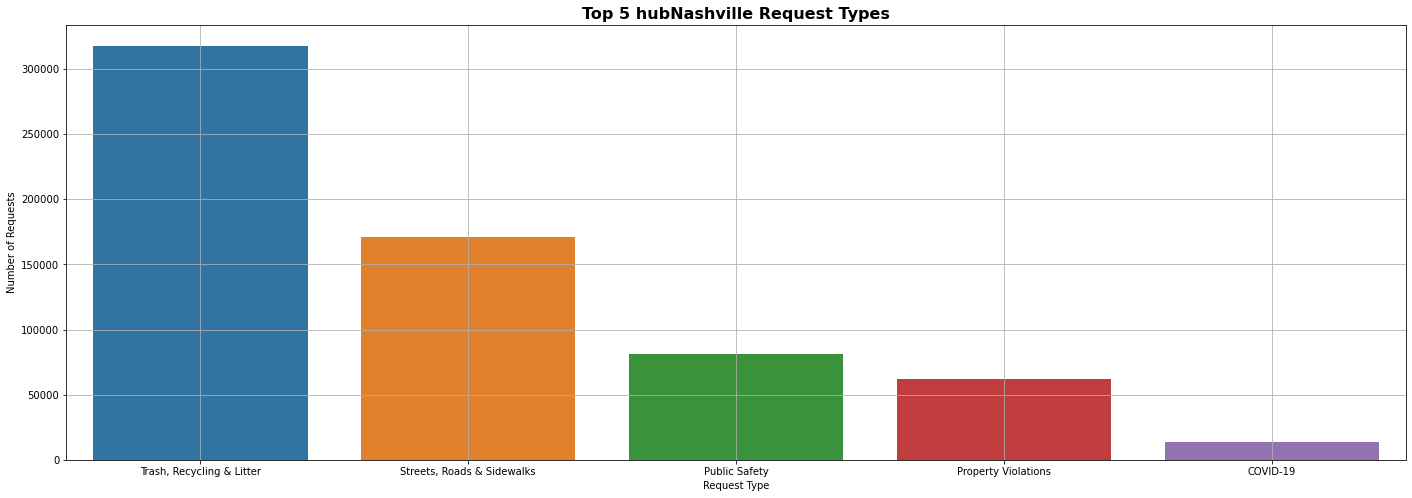

In [11]:
top_requests = main_df.loc[(main_df['Request Type'] != 'Resolved by hubNashville on First Call')]
plt.figure(figsize = (24,8))
sns.countplot(x = 'Request Type', data = top_requests, order = pd.value_counts(top_requests['Request Type']).iloc[:5].index)
plt.ylabel('Number of Requests')
plt.title('Top 5 hubNashville Request Types', weight = 'bold', size = 16)
plt.grid();
# requests_top_10 = top_requests['Request Type'].value_counts().nlargest(10)
# def count_requests(main_df):
#     return main_df['Request Type'].value_counts()
# requests_top_10_bars = main_df.groupby(['Request Type']).apply(count_requests).nlargest(10)
# requests_top_10_bars = requests_top_10_bars.reset_index()
# requests_top_10_bars

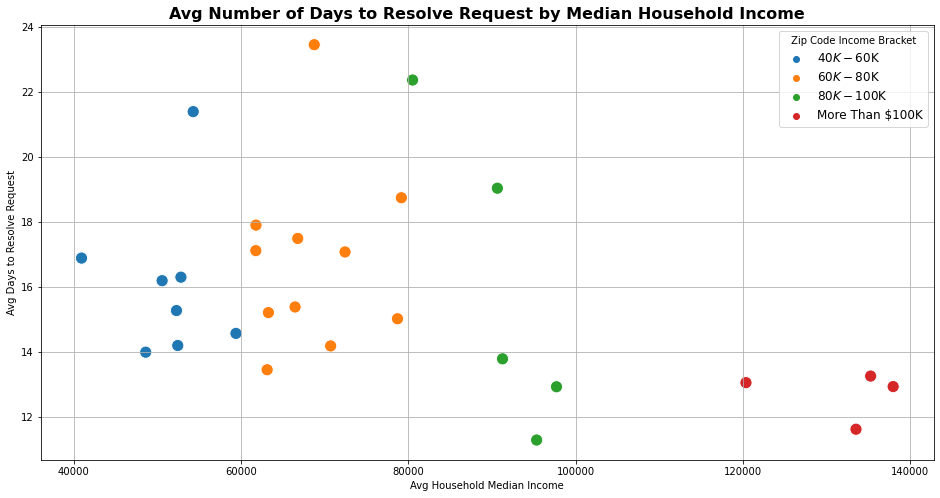

In [12]:
def avg_resp_time(main_df):
    return main_df['Days to Resolve'].mean()
avg_response_time_zip = main_df.groupby(['Households (Median Income)', 'Income Bracket']).apply(avg_resp_time)
avg_response_time_zip = avg_response_time_zip.reset_index()
avg_response_time_zip.head()
plt.figure(figsize = (16,8))
sns.scatterplot(x = 'Households (Median Income)', y = 0, hue = 'Income Bracket', data = avg_response_time_zip, s = 150)
plt.ylabel('Avg Days to Resolve Request')
plt.xlabel('Avg Household Median Income')
plt.title('Avg Number of Days to Resolve Request by Median Household Income', weight = 'bold', fontsize = 16)
plt.legend(title = 'Zip Code Income Bracket', fontsize = 12)
plt.grid();

In [13]:
main_df['Minority Population %'].value_counts()

31.1    74870
58.6    68662
37.7    65905
74.0    50040
32.8    48384
63.1    40019
38.7    35983
52.3    35596
27.6    32954
8.9     30777
53.7    29445
10.6    27150
27.4    26786
48.1    25809
18.8    20749
21.8    20628
81.9    20541
14.5    12339
13.2    11753
14.4     8339
16.6     7515
16.4     7457
3.8      6579
26.9     5084
49.0     3506
13.6     2163
60.3     1292
Name: Minority Population %, dtype: int64

In [14]:
main_df['Minority % Bracket'].value_counts()

20-40%     310594
40-60%     163018
0-20%      134821
60-80%      91351
80-100%     20541
Name: Minority % Bracket, dtype: int64

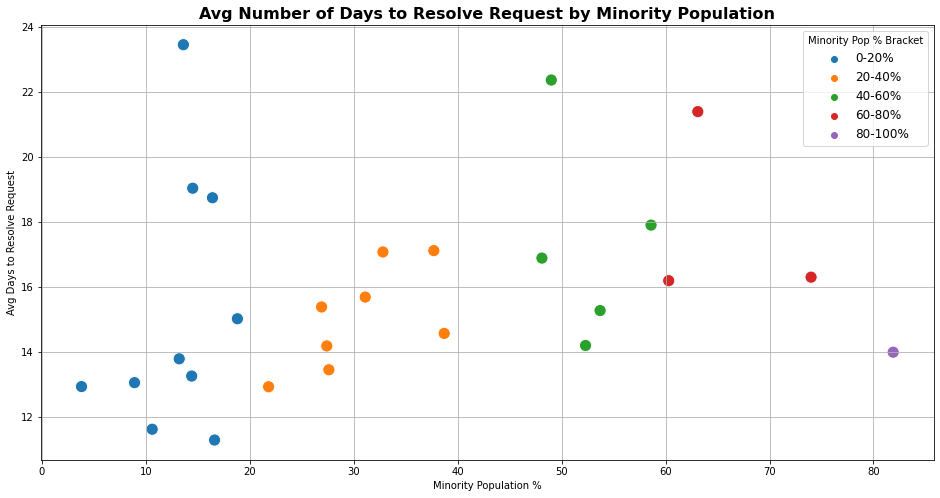

In [15]:
avg_response_time_minority = main_df.groupby(['Minority Population %', 'Minority % Bracket']).apply(avg_resp_time)
avg_response_time_minority = avg_response_time_minority.reset_index()
plt.figure(figsize = (16,8))
sns.scatterplot(x = 'Minority Population %', y = 0, hue = 'Minority % Bracket', data = avg_response_time_minority, s = 150)
plt.ylabel('Avg Days to Resolve Request')
plt.title('Avg Number of Days to Resolve Request by Minority Population', weight = 'bold', fontsize = 16)
plt.legend(title = 'Minority Pop % Bracket', fontsize = 12)
plt.grid();

In [16]:
main_df.groupby(['ZIP', 'Neighborhood'])['Days to Resolve'].mean()

ZIP    Neighborhood                                                                
37013  Antioch / Cane Ridge                                                            17.901836
37027  Brentwood                                                                       13.250684
37072  Goodlettsville                                                                  15.379843
37076  Hermitage                                                                       17.490972
37080  Joelton                                                                         23.460781
37115  Madison                                                                         14.192328
37138  Old Hickory                                                                     18.744907
37189  Whites Creek                                                                    22.372017
37201  Downtown Nashville                                                              11.279524
37203  Edgehill / Music Row / The Gulch / W

In [17]:
main_df.groupby(['Request Type'])['Days to Resolve'].mean().sort_values(ascending = False)

Request Type
Social Services & Housing                          565.105637
Education & Libraries                              361.559871
Property Violations                                 43.607404
Hands On Volunteers                                 33.859228
Streets, Roads & Sidewalks                          24.534308
Planning & Zoning                                   22.613905
2nd Avenue Explosion Information and Assistance     20.366875
Electric & Water General                            18.959433
Public Records Request                              18.426742
Other Metro Services and Forms                      11.944920
Trash, Recycling & Litter                           11.905915
Transit                                              9.532691
Parks                                                7.691699
Permits                                              7.144799
Storm Relief                                         6.217518
Other                                                4.98

In [18]:
main_df.groupby(['Request Type'], as_index = False).agg({'Days to Resolve':['mean'], 'Request #':['count']})

,Request Type,Days to Resolve,Request #
,,mean,count
0,2nd Avenue Explosion Information and Assistance,20.366875,10
1,COVID-19,2.326163,14007
2,Education & Libraries,361.559871,17
3,Electric & Water General,18.959433,13530
4,Hands On Volunteers,33.859228,1574
5,OEMGURAIL,0.257949,13
6,OEMSTRUCT,0.001586,1
7,OEMTREE,0.271730,2
8,Other,4.984608,418


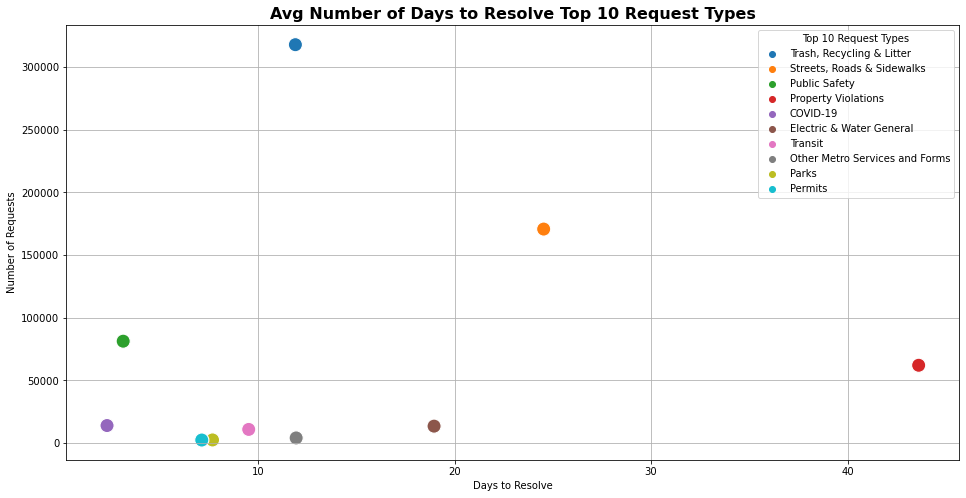

In [19]:
top_requests_resolve = top_requests.groupby(['Request Type'], as_index = False)['Days to Resolve'].mean()
top_requests_count = top_requests.groupby(['Request Type'], as_index = False)['Request #'].count()
top_requests_resolve_count = top_requests_resolve.merge(top_requests_count, left_on = 'Request Type', right_on = 'Request Type')
top10_requests = top_requests_resolve_count.nlargest(10, 'Request #')

# types = top10_requests['Request Type']
# days = top10_requests['Days to Resolve']
# count = top10_requests['Request #']

plt.figure(figsize = (16,8))
sns.scatterplot(x = 'Days to Resolve', y = 'Request #', hue = 'Request Type', data = top10_requests, s = 200)
plt.ylabel('Number of Requests')
plt.legend(title = 'Top 10 Request Types')
plt.title('Avg Number of Days to Resolve Top 10 Request Types', weight = 'bold', fontsize = 16)
plt.grid();

# for i, label in enumerate(top10_requests['Request Type']):
    # plt.annotate(label, (types.days,iat[i], types.count.iat[i]))


# sns.barplot(x = 'Days to Resolve', y = 'Request #', data = top_requests_resolve_count, order = top_requests_resolve_count.sort_values('Request #', ascending = False)['Days to Resolve'])

# top_requests_resolve_count10 = top_requests_resolve_count.groupby[('Request Type', 'Days to Resolve')]['Request #'].nlargest(10).reset_index()

#sns.countplot(x = 'Days to Resolve', data = top_requests_resolve_count, order = pd.value_counts(top_requests_resolve_count['Request #']).iloc[:10].index);


In [20]:
main_df.groupby(['Neighborhood', 'Households (Count)'])['Request #'].count()

Neighborhood                                                                  Households (Count)
12 South / Belmont / Lipscomb / Green Hills / Oak Hill / Edgehill             6632.0                20628
Airport / Donelson                                                            14203.0               32954
Antioch / Cane Ridge                                                          35483.0               68662
Belle Meade / Forest Hills / Green Hills                                      10345.0               27150
Belle Meade / West End / West Meade                                           11588.0               30777
Bellevue                                                                      18388.0               12339
Belmont / Hillsboro Village / Music Row / Vanderbilt                          6896.0                20749
Bordeaux                                                                      5877.0                20541
Bradford Hills / Brentioch / Cane Ridge / Crieve Hall  

In [21]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720325 entries, 0 to 720324
Data columns (total 58 columns):
 #   Column                                                             Non-Null Count   Dtype  
---  ------                                                             --------------   -----  
 0   ZIP                                                                720325 non-null  int64  
 1   Households (Count)                                                 720325 non-null  float64
 2   White (Count)                                                      720325 non-null  object 
 3   Black or African American (Count)                                  720325 non-null  object 
 4   American Indian and Alaska Native (Count)                          720325 non-null  float64
 5   Asian (Count)                                                      720325 non-null  object 
 6   Native Hawaiian and Other Pacific Islander (Count)                 720325 non-null  float64
 7   Some other 

In [22]:
neighborhood_requests = main_df.groupby(['Neighborhood', 'Households (Count)'], as_index = False)['Request #'].count()
neighborhood_requests['Requests Per Household'] = neighborhood_requests['Request #'] / neighborhood_requests['Households (Count)']
neighborhood_requests

,Neighborhood,Households (Count),Request #,Requests Per Household
0,12 South / Belmont / Lipscomb / Green Hills / ...,6632.0,20628,3.110374
1,Airport / Donelson,14203.0,32954,2.320214
2,Antioch / Cane Ridge,35483.0,68662,1.935067
3,Belle Meade / Forest Hills / Green Hills,10345.0,27150,2.624456
4,Belle Meade / West End / West Meade,11588.0,30777,2.655937
5,Bellevue,18388.0,12339,0.671035
6,Belmont / Hillsboro Village / Music Row / Vand...,6896.0,20749,3.008846
7,Bordeaux,5877.0,20541,3.495151
8,Bradford Hills / Brentioch / Cane Ridge / Crie...,29394.0,65905,2.242124
9,Brentwood,21914.0,8339,0.380533


In [23]:
neighborhood_top10 = neighborhood_requests.nlargest(10, 'Request #')
neighborhood_top10

,Neighborhood,Households (Count),Request #,Requests Per Household
2,Antioch / Cane Ridge,35483.0,68662,1.935067
8,Bradford Hills / Brentioch / Cane Ridge / Crie...,29394.0,65905,2.242124
13,Charlotte Park / Sylvan Heights / Sylvan Park ...,17410.0,59194,3.400000
25,North Nashville / Dickerson Pike,15745.0,50040,3.178152
16,East Nashville / Lockeland Springs,12176.0,48384,3.973719
18,Germantown,8114.0,40019,4.932093
17,Edgehill / Music Row / The Gulch / West End Ci...,10819.0,35983,3.325908
23,Madison,17142.0,35596,2.076537
1,Airport / Donelson,14203.0,32954,2.320214
4,Belle Meade / West End / West Meade,11588.0,30777,2.655937


In [24]:
neighborhood_income = main_df.groupby(['Neighborhood'], as_index = False)['Households (Median Income)'].mean()
neighborhood_minor = main_df.groupby(['Neighborhood'], as_index = False)['Minority Population %'].mean()
neighborhood_total = pd.merge(pd.merge(neighborhood_requests, neighborhood_income, on = 'Neighborhood'),neighborhood_minor, on = 'Neighborhood')
neighborhood_resolve = main_df.groupby(['Neighborhood'], as_index = False)['Days to Resolve'].mean()
neighborhood_final = pd.merge(neighborhood_total, neighborhood_resolve, on = 'Neighborhood')
neighborhood_final

,Neighborhood,Households (Count),Request #,Requests Per Household,Households (Median Income),Minority Population %,Days to Resolve
0,12 South / Belmont / Lipscomb / Green Hills / ...,6632.0,20628,3.110374,97727.0,21.8,12.921212
1,Airport / Donelson,14203.0,32954,2.320214,63135.0,27.6,13.445076
2,Antioch / Cane Ridge,35483.0,68662,1.935067,61801.0,58.6,17.901836
3,Belle Meade / Forest Hills / Green Hills,10345.0,27150,2.624456,133532.0,10.6,11.612656
4,Belle Meade / West End / West Meade,11588.0,30777,2.655937,120377.0,8.9,13.047427
5,Bellevue,18388.0,12339,0.671035,90660.0,14.5,19.038481
6,Belmont / Hillsboro Village / Music Row / Vand...,6896.0,20749,3.008846,78720.0,18.8,15.016678
7,Bordeaux,5877.0,20541,3.495151,48619.0,81.9,13.986118
8,Bradford Hills / Brentioch / Cane Ridge / Crie...,29394.0,65905,2.242124,61781.0,37.7,17.115393
9,Brentwood,21914.0,8339,0.380533,135284.0,14.4,13.250684


In [25]:
neighborhood_final.to_csv('../data/neighborhood_measures.csv', index = False)

In [26]:
neighbor_corr = neighborhood_final.drop(columns = ['Neighborhood'])
neighbor_corr = neighbor_corr.rename(columns = {'Request #': 'Total Requests', 'Days to Resolve': 'Avg Days to Resolve'})
neighborhood_white = main_df.groupby(['Neighborhood'], as_index = False)['White alone, not Hispanic or Latino (Percent Distribution)'].mean()
neighbor_corr.corr()

,Households (Count),Total Requests,Requests Per Household,Households (Median Income),Minority Population %,Avg Days to Resolve
Households (Count),1.000000,0.691941,-0.390860,-0.120091,0.158585,0.045297
Total Requests,0.691941,1.000000,0.049982,-0.343269,0.383050,-0.017750
Requests Per Household,-0.390860,0.049982,1.000000,0.044749,-0.055881,-0.314511
Households (Median Income),-0.120091,-0.343269,0.044749,1.000000,-0.755810,-0.409985
Minority Population %,0.158585,0.383050,-0.055881,-0.755810,1.000000,0.260078
Avg Days to Resolve,0.045297,-0.017750,-0.314511,-0.409985,0.260078,1.000000


/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_85412/2164015523.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)


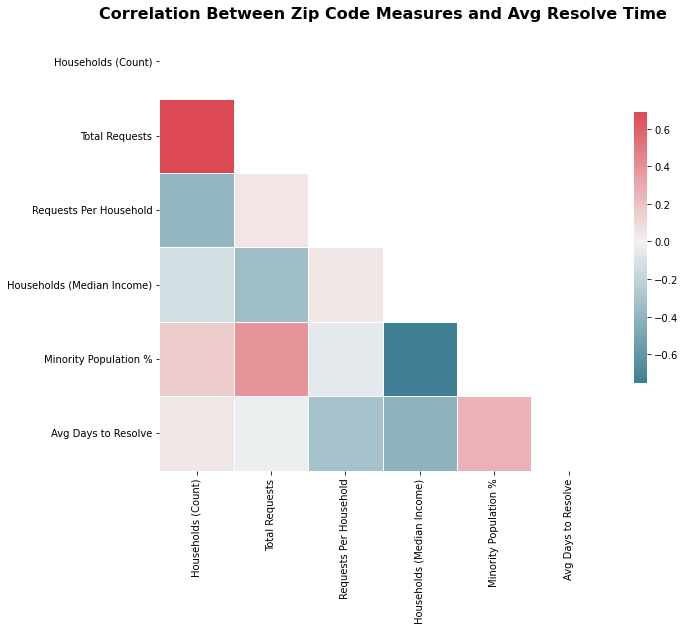

In [27]:
plt.figure(figsize = (10,10))
corr = neighbor_corr.corr()
cmap = sns.diverging_palette(220, 10, as_cmap = True)

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap = cmap, mask = mask, center = 0,
           square = True, linewidth = .5, cbar_kws={'shrink': .5})
plt.title('Correlation Between Zip Code Measures and Avg Resolve Time', fontsize = 16, weight = 'bold');

In [28]:
neighborhood_white

,Neighborhood,"White alone, not Hispanic or Latino (Percent Distribution)"
0,12 South / Belmont / Lipscomb / Green Hills / ...,78.2
1,Airport / Donelson,72.4
2,Antioch / Cane Ridge,41.4
3,Belle Meade / Forest Hills / Green Hills,89.4
4,Belle Meade / West End / West Meade,91.1
5,Bellevue,85.5
6,Belmont / Hillsboro Village / Music Row / Vand...,81.2
7,Bordeaux,18.1
8,Bradford Hills / Brentioch / Cane Ridge / Crie...,62.3
9,Brentwood,85.6


In [29]:
neighbor_final_2 = pd.merge(neighborhood_final, neighborhood_white, on = 'Neighborhood')
# neighbor_final_2.info()
neighbor_final_2 = neighbor_final_2.iloc[:, [1, 2, 3, 4, 5, 7, 6]]
neighbor_final_2 = neighbor_final_2.rename(columns = {'White alone, not Hispanic or Latino (Percent Distribution)':'White Population %', 'Request #': 'Total Requests', 'Days to Resolve': 'Avg Days to Resolve'})
neighbor_final_2.corr()

,Households (Count),Total Requests,Requests Per Household,Households (Median Income),Minority Population %,White Population %,Avg Days to Resolve
Households (Count),1.000000,0.691941,-0.390860,-0.120091,0.158585,-0.158585,0.045297
Total Requests,0.691941,1.000000,0.049982,-0.343269,0.383050,-0.383050,-0.017750
Requests Per Household,-0.390860,0.049982,1.000000,0.044749,-0.055881,0.055881,-0.314511
Households (Median Income),-0.120091,-0.343269,0.044749,1.000000,-0.755810,0.755810,-0.409985
Minority Population %,0.158585,0.383050,-0.055881,-0.755810,1.000000,-1.000000,0.260078
White Population %,-0.158585,-0.383050,0.055881,0.755810,-1.000000,1.000000,-0.260078
Avg Days to Resolve,0.045297,-0.017750,-0.314511,-0.409985,0.260078,-0.260078,1.000000


/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_85412/1276505295.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)


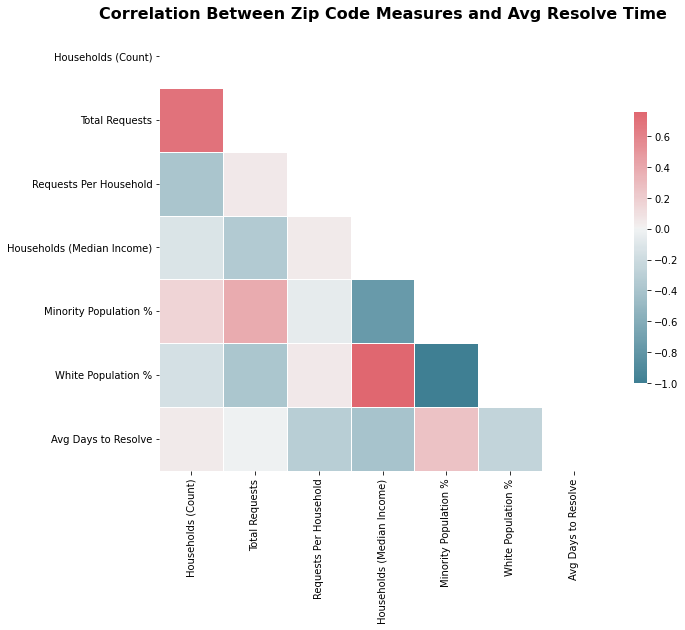

In [30]:
plt.figure(figsize = (10,10))
corr = neighbor_final_2.corr()
cmap = sns.diverging_palette(220, 10, as_cmap = True)

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap = cmap, mask = mask, center = 0,
           square = True, linewidth = .5, cbar_kws={'shrink': .5})
plt.title('Correlation Between Zip Code Measures and Avg Resolve Time', fontsize = 16, weight = 'bold');

In [31]:
neighbor_final_2

,Households (Count),Total Requests,Requests Per Household,Households (Median Income),Minority Population %,White Population %,Avg Days to Resolve
0,6632.0,20628,3.110374,97727.0,21.8,78.2,12.921212
1,14203.0,32954,2.320214,63135.0,27.6,72.4,13.445076
2,35483.0,68662,1.935067,61801.0,58.6,41.4,17.901836
3,10345.0,27150,2.624456,133532.0,10.6,89.4,11.612656
4,11588.0,30777,2.655937,120377.0,8.9,91.1,13.047427
5,18388.0,12339,0.671035,90660.0,14.5,85.5,19.038481
6,6896.0,20749,3.008846,78720.0,18.8,81.2,15.016678
7,5877.0,20541,3.495151,48619.0,81.9,18.1,13.986118
8,29394.0,65905,2.242124,61781.0,37.7,62.3,17.115393
9,21914.0,8339,0.380533,135284.0,14.4,85.6,13.250684


In [32]:
neighbor_final_3 = neighbor_final_2.nlargest(25, 'Total Requests')
neighbor_final_3

,Households (Count),Total Requests,Requests Per Household,Households (Median Income),Minority Population %,White Population %,Avg Days to Resolve
2,35483.0,68662,1.935067,61801.0,58.6,41.4,17.901836
8,29394.0,65905,2.242124,61781.0,37.7,62.3,17.115393
13,17410.0,59194,3.400000,63287.0,31.1,68.9,15.206420
25,15745.0,50040,3.178152,52827.0,74.0,26.0,16.297630
16,12176.0,48384,3.973719,72446.0,32.8,67.2,17.074394
18,8114.0,40019,4.932093,54296.0,63.1,36.9,21.398058
17,10819.0,35983,3.325908,59406.0,38.7,61.3,14.565077
23,17142.0,35596,2.076537,52448.0,52.3,47.7,14.192328
1,14203.0,32954,2.320214,63135.0,27.6,72.4,13.445076
4,11588.0,30777,2.655937,120377.0,8.9,91.1,13.047427


In [33]:
neighbor_final_3.corr()

,Households (Count),Total Requests,Requests Per Household,Households (Median Income),Minority Population %,White Population %,Avg Days to Resolve
Households (Count),1.000000,0.629266,-0.546239,-0.193756,0.250062,-0.250062,0.373715
Total Requests,0.629266,1.000000,-0.059162,-0.452568,0.509785,-0.509785,0.313106
Requests Per Household,-0.546239,-0.059162,1.000000,0.006124,-0.044023,0.044023,-0.257171
Households (Median Income),-0.193756,-0.452568,0.006124,1.000000,-0.783989,0.783989,-0.516344
Minority Population %,0.250062,0.509785,-0.044023,-0.783989,1.000000,-1.000000,0.391899
White Population %,-0.250062,-0.509785,0.044023,0.783989,-1.000000,1.000000,-0.391899
Avg Days to Resolve,0.373715,0.313106,-0.257171,-0.516344,0.391899,-0.391899,1.000000


/var/folders/46/zm0dtt4s22d760_6ml4_t_vr0000gn/T/ipykernel_85412/2450383818.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)


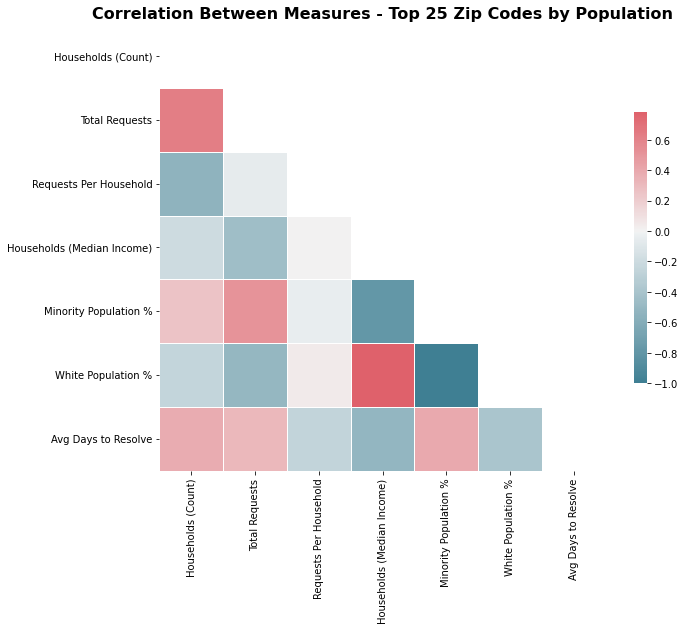

In [34]:
plt.figure(figsize = (10,10))
corr = neighbor_final_3.corr()
cmap = sns.diverging_palette(220, 10, as_cmap = True)

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap = cmap, mask = mask, center = 0,
           square = True, linewidth = .5, cbar_kws={'shrink': .5})
plt.title('Correlation Between Measures - Top 25 Zip Codes by Population', fontsize = 16, weight = 'bold');

In [35]:
neighborhood_10_requests = neighborhood_final.nlargest(5, 'Request #')

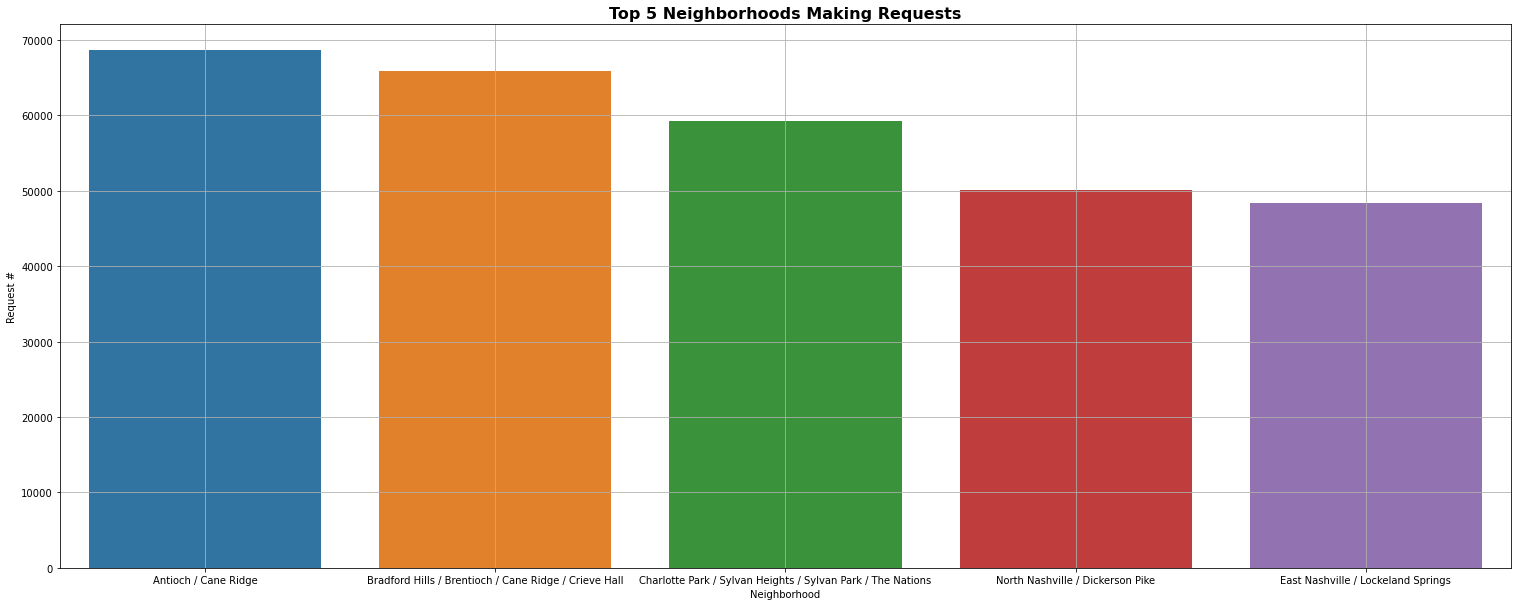

In [36]:
plt.figure(figsize = (26, 10))
sns.barplot(x = 'Neighborhood', y = 'Request #', data = neighborhood_10_requests)
plt.title('Top 5 Neighborhoods Making Requests', fontsize = 16, weight = 'bold')
plt.grid();

In [37]:
main_df.groupby(['Neighborhood'])['Additional Subrequest Type'].value_counts()

Neighborhood                                                       Additional Subrequest Type            
12 South / Belmont / Lipscomb / Green Hills / Oak Hill / Edgehill  Trash - Curbside/Alley Missed Pickup      2140
                                                                   Recycle - Curbside/Alley Missed Pickup    1455
                                                                   Control Number Request for Towing         1394
                                                                   Trash - Report a Damaged Cart             1079
                                                                   Roadway                                    924
                                                                                                             ... 
Whites Creek                                                       Report a Crime                               1
                                                                   Request New Signal           

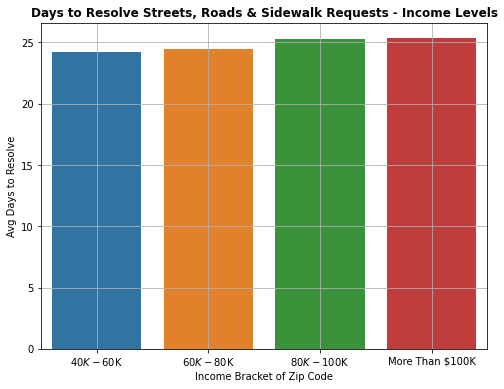

In [38]:
def streets_mean(main_df):
    return main_df['Days to Resolve'].mean()
request_streets = main_df.loc[(main_df['Request Type'] == 'Streets, Roads & Sidewalks')]
streets_groups = request_streets.groupby(['Income Bracket']).apply(streets_mean)
streets_groups = streets_groups.reset_index()
plt.figure(figsize = (8,6))
sns.barplot(x = 'Income Bracket', y = 0, data = streets_groups)
plt.ylabel('Avg Days to Resolve')
plt.xlabel('Income Bracket of Zip Code')
plt.title('Days to Resolve Streets, Roads & Sidewalk Requests - Income Levels', weight = 'bold', fontsize = 12)
plt.grid();

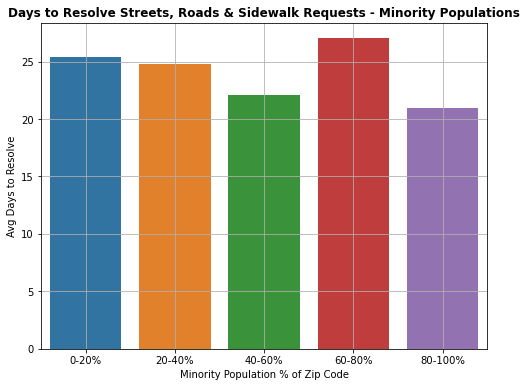

In [39]:
streets_groups_race = request_streets.groupby(['Minority % Bracket']).apply(streets_mean)
streets_groups_race = streets_groups_race.reset_index()
plt.figure(figsize = (8,6))
sns.barplot(x = 'Minority % Bracket', y = 0, data = streets_groups_race)
plt.ylabel('Avg Days to Resolve')
plt.xlabel('Minority Population % of Zip Code')
plt.title('Days to Resolve Streets, Roads & Sidewalk Requests - Minority Populations', weight = 'bold', fontsize = 12)
plt.grid();

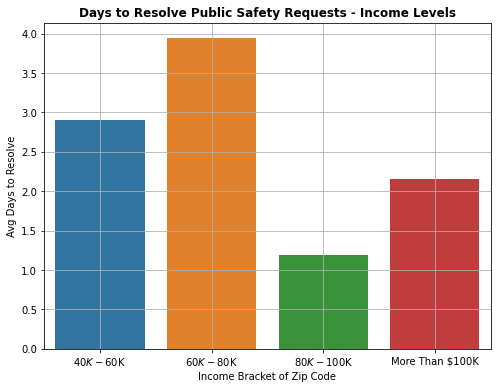

In [40]:
def safety_mean(main_df):
    return main_df['Days to Resolve'].mean()
request_safety = main_df.loc[(main_df['Request Type'] == 'Public Safety')]
safety_groups = request_safety.groupby(['Income Bracket']).apply(safety_mean)
safety_groups = safety_groups.reset_index()
plt.figure(figsize = (8,6))
sns.barplot(x = 'Income Bracket', y = 0, data = safety_groups)
plt.ylabel('Avg Days to Resolve')
plt.xlabel('Income Bracket of Zip Code')
plt.title('Days to Resolve Public Safety Requests - Income Levels', weight = 'bold', fontsize = 12)
plt.grid();

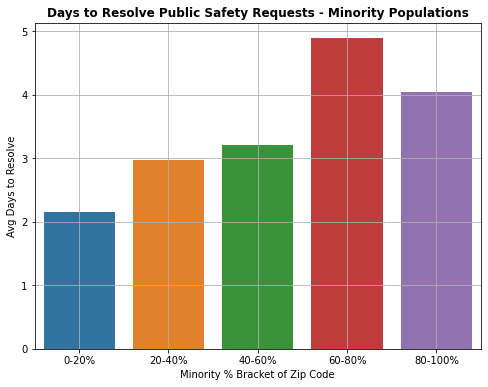

In [41]:
safety_groups_race = request_safety.groupby(['Minority % Bracket']).apply(safety_mean)
safety_groups_race = safety_groups_race.reset_index()
plt.figure(figsize = (8,6))
sns.barplot(x = 'Minority % Bracket', y = 0, data = safety_groups_race)
plt.ylabel('Avg Days to Resolve')
plt.xlabel('Minority % Bracket of Zip Code')
plt.title('Days to Resolve Public Safety Requests - Minority Populations', weight = 'bold', fontsize = 12)
plt.grid();

In [42]:
request_trash.groupby(['Request Type'], as_index = False)['Subrequest Type'].value_counts()

,Request Type,Subrequest Type,count
0,"Trash, Recycling & Litter",Cart Service,88737
1,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,80744
2,"Trash, Recycling & Litter",Missed Pickup - Recycle Cart Service,40408
3,"Trash, Recycling & Litter",File a Trash or Recycling Complaint,26209
4,"Trash, Recycling & Litter",New Service/Activate Service,24717
5,"Trash, Recycling & Litter",Illegal Dumping,10854
6,"Trash, Recycling & Litter",Extra Cart Pickup Request,10282
7,"Trash, Recycling & Litter",Litter,7239
8,"Trash, Recycling & Litter",Brush Collection,6818
9,"Trash, Recycling & Litter",Unwanted Recycling or Trash,5104


In [43]:
request_streets.groupby(['Request Type'], as_index = False)['Subrequest Type'].value_counts()

,Request Type,Subrequest Type,count
0,"Streets, Roads & Sidewalks",Blocking the Right of Way,18779
1,"Streets, Roads & Sidewalks",Potholes,16429
2,"Streets, Roads & Sidewalks",Damaged Sign,13070
3,"Streets, Roads & Sidewalks",Traffic Light Issue,12864
4,"Streets, Roads & Sidewalks",Dead Animal Pickup,10588
...,...,...,...
57,"Streets, Roads & Sidewalks",Changed Pothole to Roadwork Complaint,1
58,"Streets, Roads & Sidewalks",Remove debris from a Roadway,1
59,"Streets, Roads & Sidewalks",Trash Service Damaged Property,1
60,"Streets, Roads & Sidewalks",Tree Concerns,1


In [44]:
request_safety.groupby(['Request Type'], as_index = False)['Subrequest Type'].value_counts()

,Request Type,Subrequest Type,count
0,Public Safety,Control Number Request for Towing,51221
1,Public Safety,Request Non-Emergency Police Assistance,9925
2,Public Safety,Abandoned Vehicles,7538
3,Public Safety,Improperly Parked Vehicles,4194
4,Public Safety,Lost/Stolen Property,2013
5,Public Safety,Narcotics/Prostitution/Loitering,1320
6,Public Safety,Animal Welfare Concern,1235
7,Public Safety,Report a Crime,1122
8,Public Safety,Blasting Reports,637
9,Public Safety,Stray Animals,509


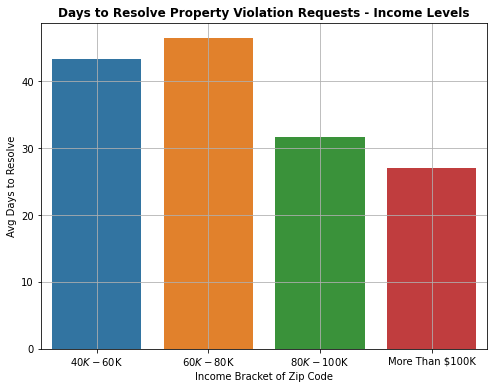

In [45]:
def property_mean(main_df):
    return main_df['Days to Resolve'].mean()
request_property = main_df.loc[(main_df['Request Type'] == 'Property Violations')]
property_groups = request_property.groupby(['Income Bracket']).apply(property_mean)
property_groups = property_groups.reset_index()
plt.figure(figsize = (8,6))
sns.barplot(x = 'Income Bracket', y = 0, data = property_groups)
plt.ylabel('Avg Days to Resolve')
plt.xlabel('Income Bracket of Zip Code')
plt.title('Days to Resolve Property Violation Requests - Income Levels', weight = 'bold', fontsize = 12)
plt.grid();

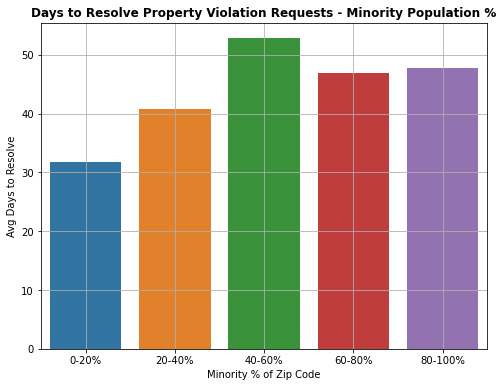

In [46]:
property_groups_race = request_property.groupby(['Minority % Bracket']).apply(property_mean)
property_groups_race = property_groups_race.reset_index()
plt.figure(figsize = (8,6))
sns.barplot(x = 'Minority % Bracket', y = 0, data = property_groups_race)
plt.ylabel('Avg Days to Resolve')
plt.xlabel('Minority % of Zip Code')
plt.title('Days to Resolve Property Violation Requests - Minority Population %', weight = 'bold', fontsize = 12)
plt.grid();

In [47]:
request_property.groupby(['Request Type'], as_index = False)['Subrequest Type'].value_counts()

,Request Type,Subrequest Type,count
0,Property Violations,Junk and Debris,14196
1,Property Violations,Tall Grass and Weeds,11459
2,Property Violations,Residential Complaint,10118
3,Property Violations,Noise Violations,8395
4,Property Violations,Cars Parked on Lawn,6303
5,Property Violations,Dilapidated Structures,3554
6,Property Violations,Tenant Complaint,1281
7,Property Violations,Noise Violations - Construction Noise,1189
8,Property Violations,Graffiti on Private Property,1173
9,Property Violations,Fence Complaints,960


In [48]:
main_df.dtypes

ZIP                                                                    int64
Households (Count)                                                   float64
White (Count)                                                         object
Black or African American (Count)                                     object
American Indian and Alaska Native (Count)                            float64
Asian (Count)                                                         object
Native Hawaiian and Other Pacific Islander (Count)                   float64
Some other race (Count)                                               object
Two or more races (Count)                                             object
Hispanic or Latino origin (of any race) (Count)                       object
White alone, not Hispanic or Latino (Count)                           object
Households (Percent Distribution)                                     object
White (Percent Distribution)                                         float64